# Importaciones

In [256]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import drive
import pandas as pd
import numpy as np

# Importacion de dato

In [322]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [323]:
path = '/content/drive/MyDrive/Colab Notebooks/BBDD/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)

# Limpieza de datos

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [325]:
# Limpieza de espacios
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [326]:
# Usamos describe para identificar anormalidad en los datos, en este caso no hay
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [327]:
# Identificar si estan correctos los tipos
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [328]:
# Se identifica un espacio vacio
df['totalcharges'].value_counts()

,count
totalcharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [329]:
# En esta linea de codigo se limpia todo los datos que solo era un espacio, se elimina espacio, se convierte en null y con astype(float) totalcharges ahora es un float
# En este dato se reemplazara con 0 ya que solo son 11 lineas y puede que el cliente ahun no a pagado

df['totalcharges'] = df['totalcharges'].str.strip()
df['totalcharges'] = df['totalcharges'].replace('', np.nan)
df['totalcharges'] = df['totalcharges'].fillna(0)
df['totalcharges'] = df['totalcharges'].astype(float)

In [330]:
# Se verifica que espacio ya no este
df['totalcharges'].value_counts()

,count
totalcharges,
0.00,11
20.20,11
19.75,9
20.05,8
19.90,8
...,...
130.15,1
3211.90,1
7843.55,1


In [331]:
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


# Se verifica datos duplicado

In [332]:
# No hay duplicados
df.duplicated().sum()

np.int64(0)

# Se indentifica que hay un dato llamado **No internet service** que hay que limpiar

In [333]:
# Todas estas columnas tiene el termino "No internet service"
fd_fill =  (df == "No internet service").sum()
fd_fill

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,1526


In [334]:
# Se tendra una copia de df si se nesecita el analisis de estos objetos "No internet service" y "No phone service"
df_copia = df.copy()

In [335]:
# En este codigo verificamos que todos los "No internet service" no tienen internet, con este dato podriamos
# reemplazarlo con un "No" ya que nos ayudaria al analisis y si quisieramos cuales no tienen servicio basta con internetservice

columnas_con_no = []

for columna in df.columns:
    if "No" in df[columna].values:
        columnas_con_no.append(columna)
df_filtrado = df[df["internetservice"] == "No"]
df_filtrado[columnas_con_no]

,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,churn
11,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No
16,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No
21,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No
22,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Yes
33,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No
7019,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No
7020,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,No
7030,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,No


In [336]:
# Se reemplaza objeto
df = df.replace("No internet service", "No")

In [337]:
# Se vailda
(df == "No internet service").sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


# Se indentifica que hay unos dato llamado **No phone service** que podriamos limpiar

In [338]:
# Pasa lo mismo con este objeto, se puede identificar que no tiene servicio phone solo con el phoneservice por lo cual se reemplazara con "No"
df = df.replace("No phone service", "No")


In [340]:
# Se valida
(df == "No phone service").sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [341]:
df.head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Tenemos dos tablas
 df_copia = Tiene los datos "No internet service"  y "No phone service"
 df =  Dataframe limpia

#Visualización

# Univariadas

In [343]:
df.groupby("gender")["totalcharges"].sum().reset_index()

,gender,totalcharges
0,Female,7952354.2
1,Male,8103814.5


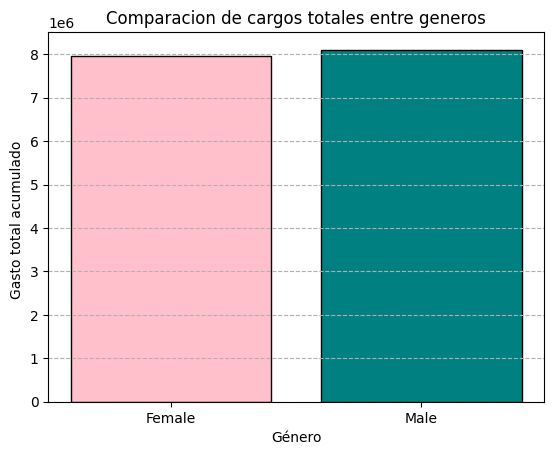

In [352]:
df_fill = df.groupby("gender")["totalcharges"].sum().reset_index()

colores = ['pink', 'teal']

plt.bar(df_fill["gender"], df_fill["totalcharges"], color=colores, edgecolor="black")

plt.title('Comparacion de cargos totales entre generos')
plt.xlabel('Género')
plt.ylabel('Gasto total acumulado ')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Se valido que los dos generos estas iguales en cargos totales

In [345]:
df['contract'].value_counts()

,count
contract,
Month-to-month,3875
Two year,1695
One year,1473


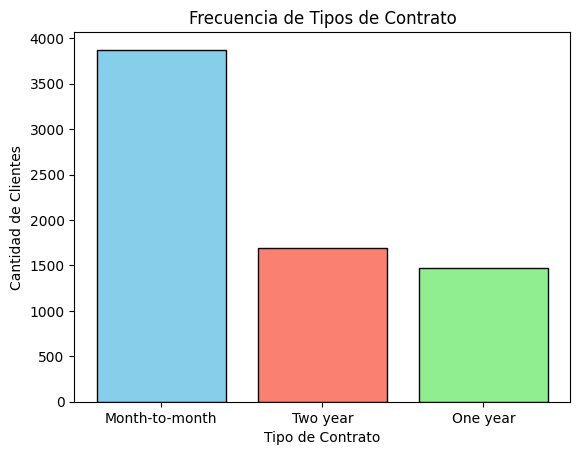

In [351]:
df_fill = df['contract'].value_counts()
colores = ['skyblue', 'salmon', 'lightgreen']

plt.bar(df_fill.index, df_fill.values, color=colores, edgecolor='black')
plt.title('Frecuencia de Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

Se puede observar que mas contratos de meses que de un año

# Multivariadas

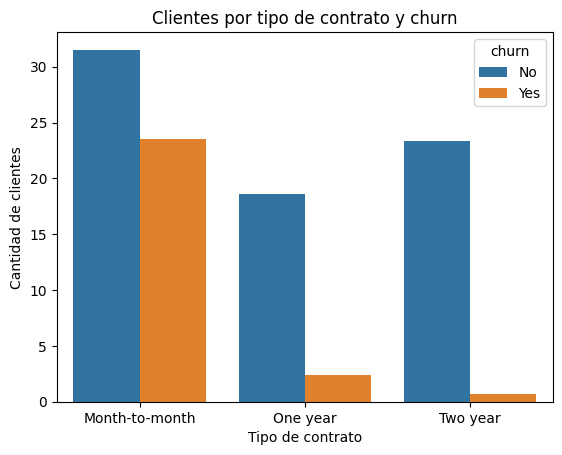

In [350]:
# Se uso seaborn para este ejercicio
# https://seaborn.pydata.org/generated/seaborn.countplot.html#

sns.countplot(df, x="contract", hue="churn", stat="percent")
plt.title("Clientes por tipo de contrato y churn")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

Este grfico de barra predenta que los Clientes que se fueron en el último mes

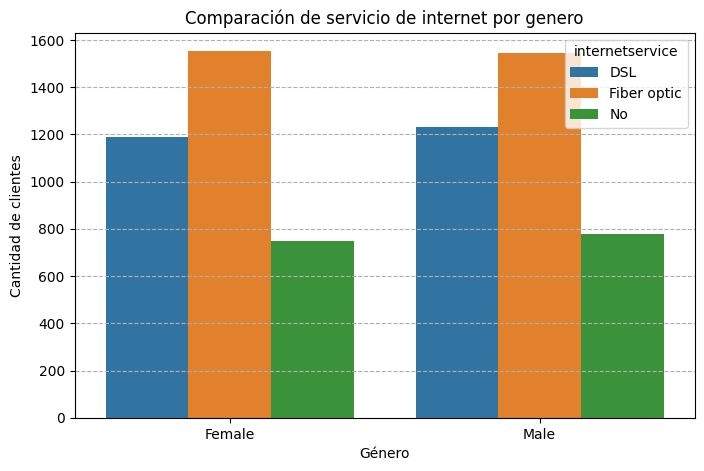

In [349]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="gender", hue="internetservice")
plt.title("Comparación de servicio de internet por genero")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

 Esta comparacion de los indica que la fibra optica esta en la vanguardia el DLS los hombre superan a las mujeres